# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Reading the dataset

In [2]:
dataset = pd.read_csv('Mall-Customer-Segmentation.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [5]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
dataset.drop(['CustomerID'],axis=1, inplace=True)
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
dataset.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# Distribution of Data

C:\Users\ratan\miniconda3\envs\my_datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ratan\miniconda3\envs\my_datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ratan\miniconda3\envs\my_datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

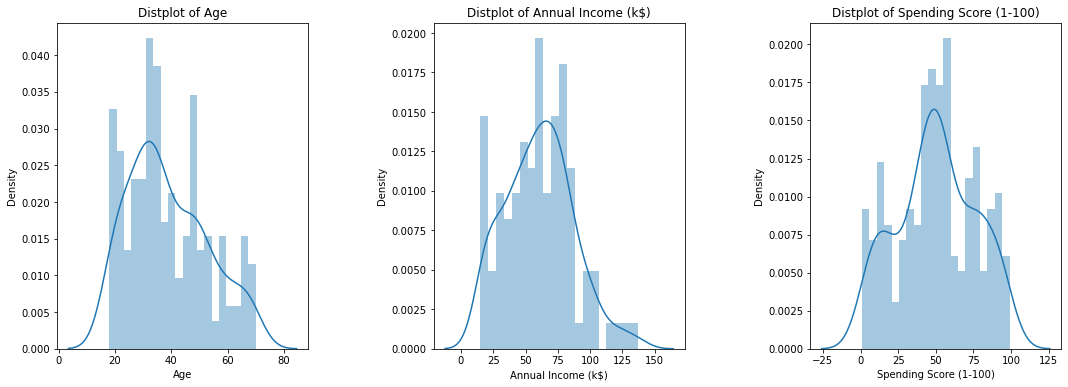

In [9]:
plt.figure(figsize=(18,6))
i = 0
for col in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    i += 1
    plt.subplot(1,3,i)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(dataset[col],bins=20)
    plt.title(f'Distplot of {col}')
plt.show()

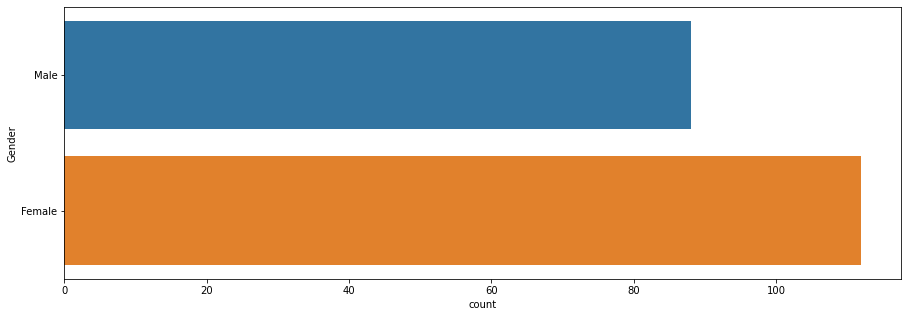

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=dataset)
plt.show()

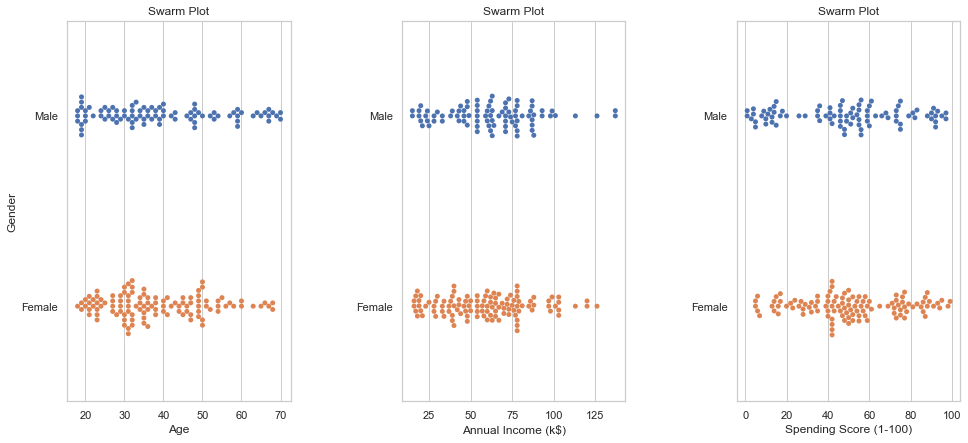

In [30]:
plt.figure(figsize=(16,7))
i = 0
for col in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    i += 1
    plt.subplot(1,3,i)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.swarmplot(x=col,y='Gender',data=dataset)
    plt.ylabel('Gender' if i==1 else '')
    plt.title('Swarm Plot')
plt.show()

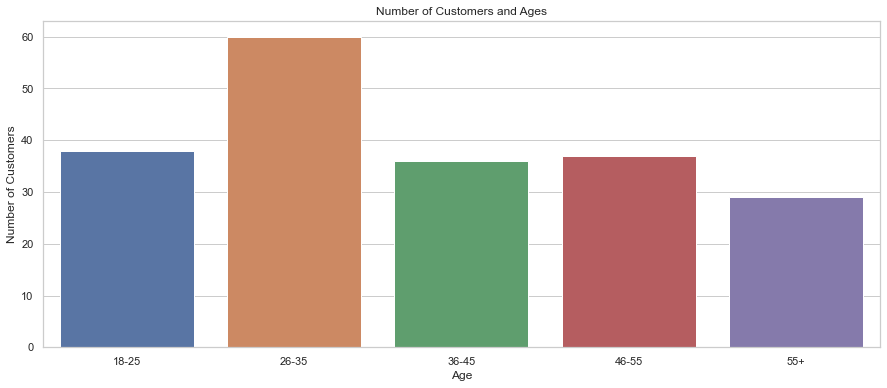

In [12]:
age_18_25 = dataset.Age[(dataset.Age <= 25) & (dataset.Age >= 18)]
age_26_35 = dataset.Age[(dataset.Age <= 35) & (dataset.Age >= 26)]
age_36_45 = dataset.Age[(dataset.Age <= 45) & (dataset.Age >= 36)]
age_46_55 = dataset.Age[(dataset.Age <= 55) & (dataset.Age >= 46)]
age_55above = dataset.Age[dataset.Age >= 56]

age_x = ["18-25","26-35","36-45","46-55","55+"]
age_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=age_x, y=age_y)
plt.title("Number of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

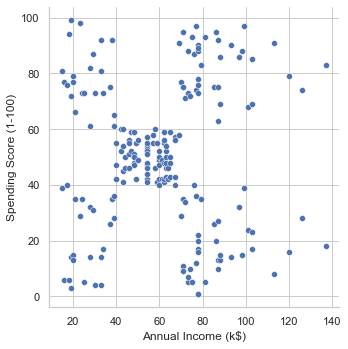

In [13]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=dataset)

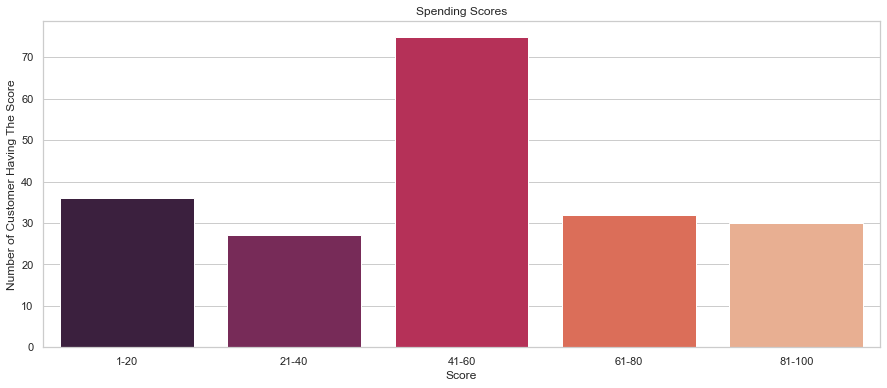

In [14]:
ss_1_20 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 1) & (dataset["Spending Score (1-100)"] <= 20)]
ss_21_40 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 21) & (dataset["Spending Score (1-100)"] <= 40)]
ss_41_60 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 41) & (dataset["Spending Score (1-100)"] <= 60)]
ss_61_80 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 61) & (dataset["Spending Score (1-100)"] <= 80)]
ss_81_100 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 81) & (dataset["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_x, y=score_y,palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having The Score")
plt.show()

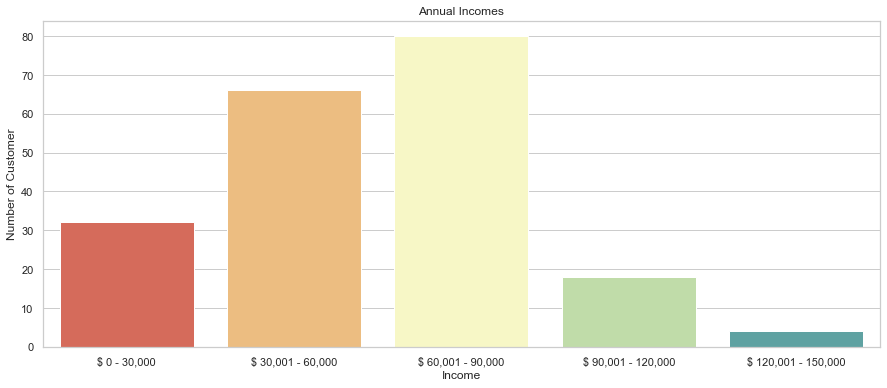

In [15]:
ai_0_30 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 0) & (dataset["Annual Income (k$)"] <= 30)]
ai_31_60 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 31) & (dataset["Annual Income (k$)"] <= 60)]
ai_61_90 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 61) & (dataset["Annual Income (k$)"] <= 90)]
ai_91_120 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 91) & (dataset["Annual Income (k$)"] <= 120)]
ai_121_150 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 121) & (dataset["Annual Income (k$)"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# Clustering

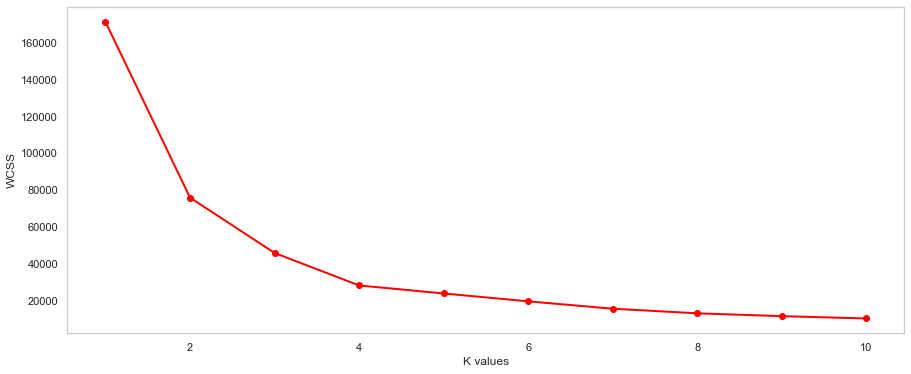

In [16]:
x1 = dataset.loc[:,['Age','Spending Score (1-100)']].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='o')
plt.xlabel('K values')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x1)

print(label)

[1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 1 1 3 0 1 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3
 0 3 0 2 0 2 1 3 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 0 1 0 2 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 2 0
 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [18]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


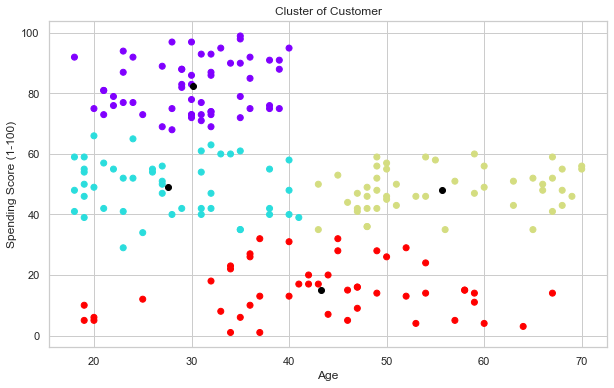

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customer')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

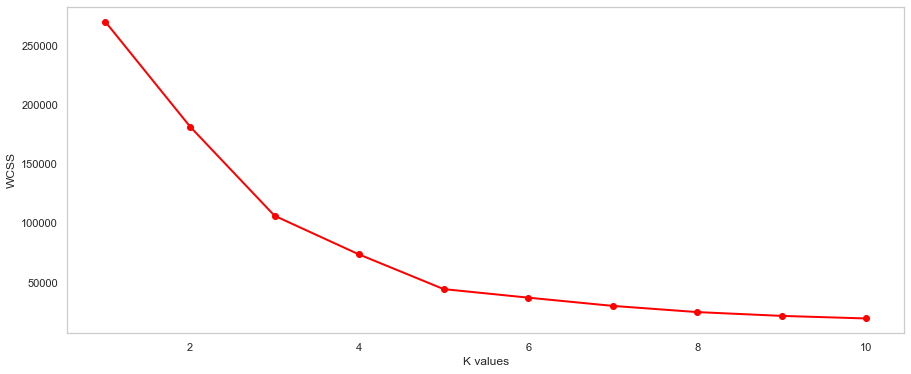

In [20]:
x2 = dataset.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='o')
plt.xlabel('K values')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(x2)

print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [22]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


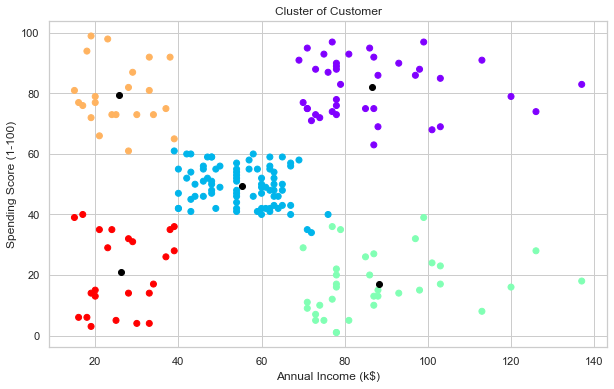

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

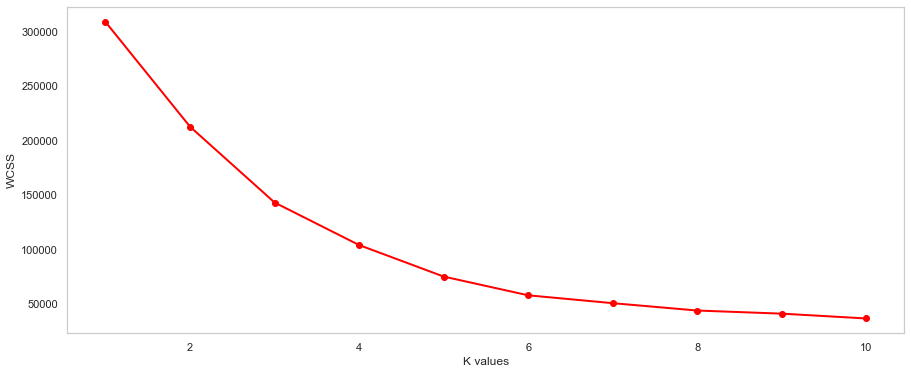

In [24]:
x3 = dataset.iloc[:,1:]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='o')
plt.xlabel('K values')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(x3)

print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [26]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]]


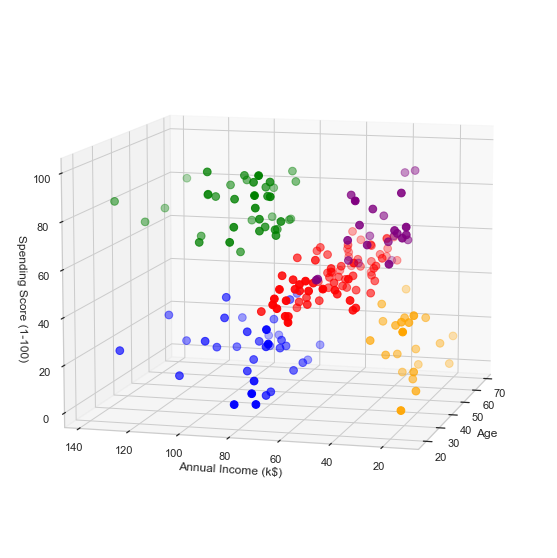

In [56]:
clusters = kmeans.fit_predict(x3)
dataset['label'] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.Age[dataset.label == 0], dataset["Annual Income (k$)"][dataset.label == 0], dataset["Spending Score (1-100)"][dataset.label == 0], c='blue', s=60)
ax.scatter(dataset.Age[dataset.label == 1], dataset["Annual Income (k$)"][dataset.label == 1], dataset["Spending Score (1-100)"][dataset.label == 1], c='red', s=60)
ax.scatter(dataset.Age[dataset.label == 2], dataset["Annual Income (k$)"][dataset.label == 2], dataset["Spending Score (1-100)"][dataset.label == 2], c='orange', s=60)
ax.scatter(dataset.Age[dataset.label == 3], dataset["Annual Income (k$)"][dataset.label == 3], dataset["Spending Score (1-100)"][dataset.label == 3], c='green', s=60)
ax.scatter(dataset.Age[dataset.label == 4], dataset["Annual Income (k$)"][dataset.label == 4], dataset["Spending Score (1-100)"][dataset.label == 4], c='purple', s=60)
ax.view_init(10,195)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()